### Collect the train error, test error, mutual information $I(E;Y)$, sample entropy $H_s$ and expert usage entropy $H_u$ for all the models trained with MNIST dataset. Store the results in the '../results/mnist_results.csv' file.

In [1]:
import sys
sys.path.append('../src/cifar10')
sys.path.append('../src')

In [2]:
from cifar10_original_moe_training import *
from original_moe_training import *

/nobackup/projects/bdrap03/yamuna/miniconda/envs/mnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Files already downloaded and verified
device cuda:1


In [3]:
from helper.collect_results import *

device cuda:0


In [4]:
# Paths to where the trained models and figures will be stored. You can change this as you see fit.
fig_path = '../figures/cifar10'
model_path = '../models/cifar10'
results_path = '../results/cifar10'

if not os.path.exists(fig_path):
    os.mkdir(fig_path)
if not os.path.exists(model_path):
    os.mkdir(model_path)
if not os.path.exists(results_path):
    os.mkdir(results_path)        

In [5]:
#Function to display the images
def plot_colour_images(images_to_plot, titles=None, nrows=None, ncols=6, thefigsize=(18,18)):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    if nrows is None:
        nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()
    
    for i in range(n_images):
        img = images_to_plot[i,:,:,:]
        npimg = np.clip(img.numpy(),0,1)
        ax[i].imshow(npimg)
        ax[i].axis('off')  
        if titles is not None and i<10:
            ax[i].set_title(titles[i%10])

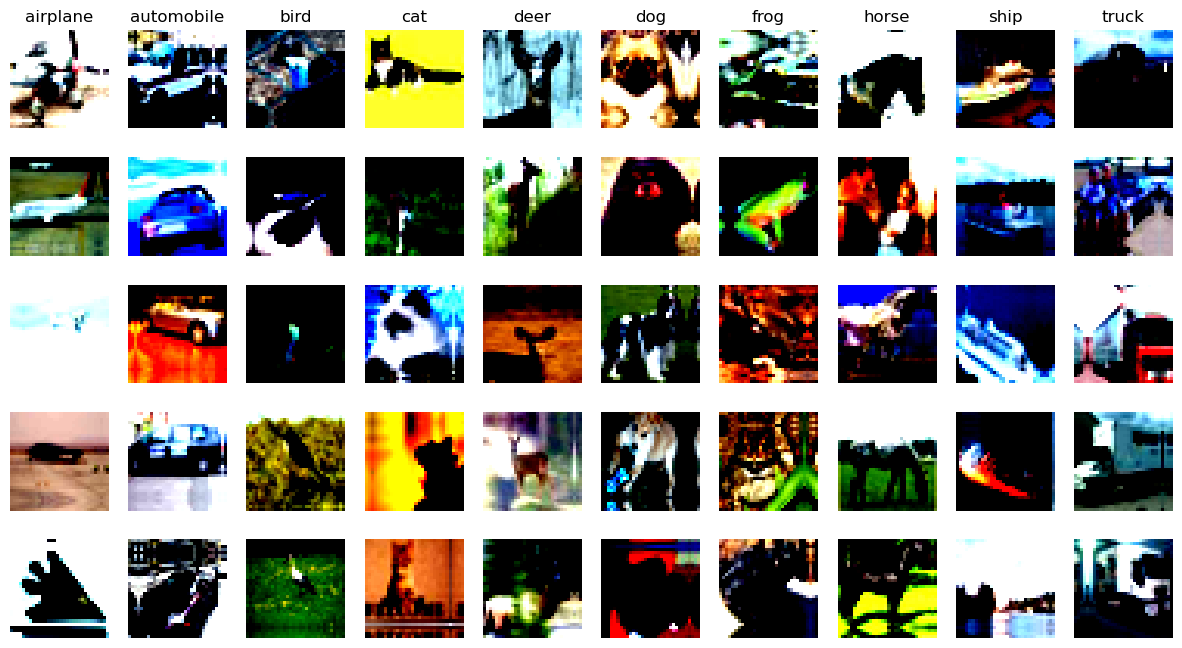

In [6]:
# get some random training images
dataiter = iter(cifar10_trainloader)
images, labels = dataiter.next()

images_to_plot = []
for i in range(0, len(classes_cifar10)):
    # pick images of each class
    index = np.where(labels==i)[0]
    if i == 0:
        images_to_plot.append(images[index[0:5],:,:])
    else:
        images_to_plot.append(images[index[0:5],:,:])
images_to_plot = torch.transpose(torch.stack(images_to_plot),0,1)
new_shape = images_to_plot.shape
images_to_plot = images_to_plot.reshape(new_shape[0]*new_shape[1], new_shape[2], new_shape[3], new_shape[4])
images_to_plot = images_to_plot.permute(0,2,3,1)

plot_colour_images(images_to_plot, nrows=5, ncols=10,thefigsize=(15,8), titles=classes_cifar10)
    


In [ ]:
# File to collect the results of all the runs
filename = 'cifar10_results.csv'

In [ ]:
total_experts = 5
num_classes = 10
num_epochs = 200

In [ ]:
m = 'cifar10_single_model'
collect_single_result(m, num_classes, num_epochs, testloader=cifar10_testloader, 
                      model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init_top_2'
collect_results(m, 'moe_top_k_model', k=2, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attention_rand_init_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attention_rand_init_top_2'
collect_results(m, 'moe_top_k_model', k=2,  total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attention_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_stochastic_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_stochastic_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', k=2, w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attn_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attn_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', k=2, w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init_wideres'
w_sample_sim_same_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3]
w_sample_sim_diff_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_rand_init_top_2_wideres'
w_sample_sim_same_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3]
w_sample_sim_diff_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', k=2, w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attn_rand_init_wideres'
w_sample_sim_same_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3]
w_sample_sim_diff_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_with_attn_rand_init_top_2_wideres'
w_sample_sim_same_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3]
w_sample_sim_diff_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', k=2, w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attention_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attention_rand_init_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attention_rand_init_top_2'
collect_results(m, 'moe_top_k_model', k=2, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', k=2, w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_rand_init_wideres'
w_sample_sim_same_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3]
w_sample_sim_diff_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_rand_init_top_2_wideres'
w_sample_sim_same_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3]
w_sample_sim_diff_range = [1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', k=2, w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

### Final results

#### These are the final performance results, reported in the paper, on the test data for the model with the minimum validation error for each category of MoE model and training method.

In [ ]:
import pandas as pd
filename = os.path.join(results_path, 'cifar10_results.csv')
data = pd.read_csv(filename)

In [10]:
final_results_filename = os.path.join(results_path,'cifar10_final_results.csv')

In [ ]:
models = ['cifar10_single_model',
          'cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_stochastic_rand_init_10', 'cifar10_with_attn_stochastic_rand_init', 
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_rand_init_wideres', 'cifar10_rand_init_top_2_wideres',
          'cifar10_with_attn_rand_init_wideres', 'cifar10_with_attn_rand_init_top_2_wideres',        
          'new_cifar10_with_attention_rand_init_10','new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',         
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          'new_cifar10_with_attn_rand_init_wideres', 'new_cifar10_with_attn_rand_init_top_2_wideres',     
          ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [11]:
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

,filename,val error,test error,mutual information,sample entropy,experts usage,per_task_entropy,val error std
0,cifar10_single_model,40.225,42.744,NA,NA,NA,NA,0.011
1,cifar10_rand_init_10_10_models.pt,68.311,71.855,1.839,0.16,1.867,0.705,0.019
2,cifar10_with_attention_rand_init_10_10_models.pt,60.859,64.717,0.0,0.0,0.0,0.0,0.105
3,cifar10_stochastic_rand_init_10_10_models.pt,73.262,72.822,1.46,0.0,1.505,0.498,0.016
4,cifar10_with_attn_stochastic_rand_init_10_10_m...,83.066,85.908,3.18,0.0,3.31,0.895,0.061
5,cifar10_rand_init_top_1_10_10_models.pt,64.404,67.188,0.969,0.0,0.969,0.349,0.036
6,cifar10_with_attention_rand_init_top_1_10_10_m...,62.139,64.180,0.0,0.0,0.0,0.0,0.076
7,cifar10_rand_init_top_2_10_10_models.pt,74.678,77.021,1.71,0.148,1.731,0.466,0.017
8,cifar10_with_attention_rand_init_top_2_10_10_m...,85.430,86.572,2.943,0.17,3.247,0.992,0.005
9,cifar10_rand_init_importance_0.6_10_10_models.pt,79.531,81.494,3.304,0.262,3.304,1.182,0.026


Train Accuracy 0.072
Max Validation Accuracy 0.822
Min Validation Error 0.178
Mutual Information 2.218
Sample Entropy 0.062
Expert Usage 2.321
Best model index 8
cifar10_with_attention_rand_init_top_2_10_5_models.pt


<Figure size 640x480 with 0 Axes>

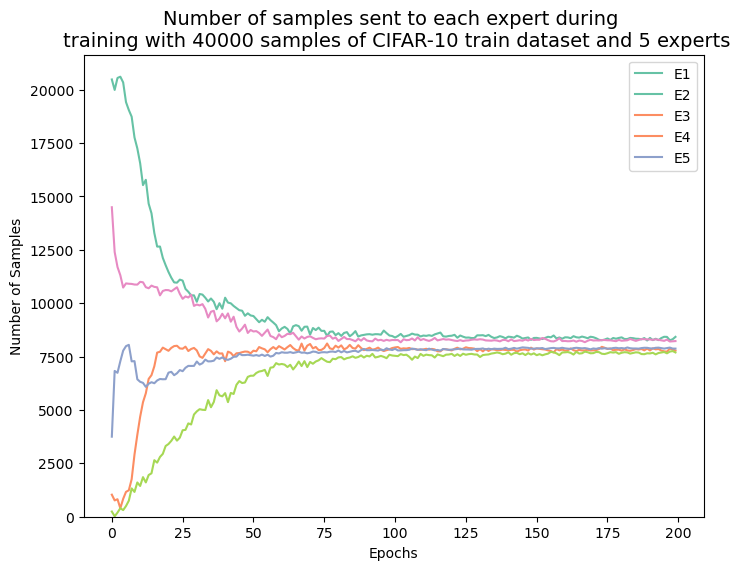

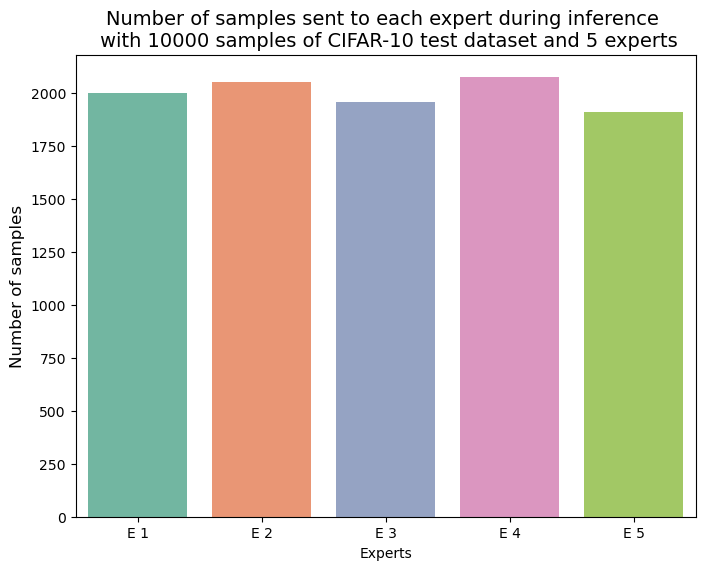

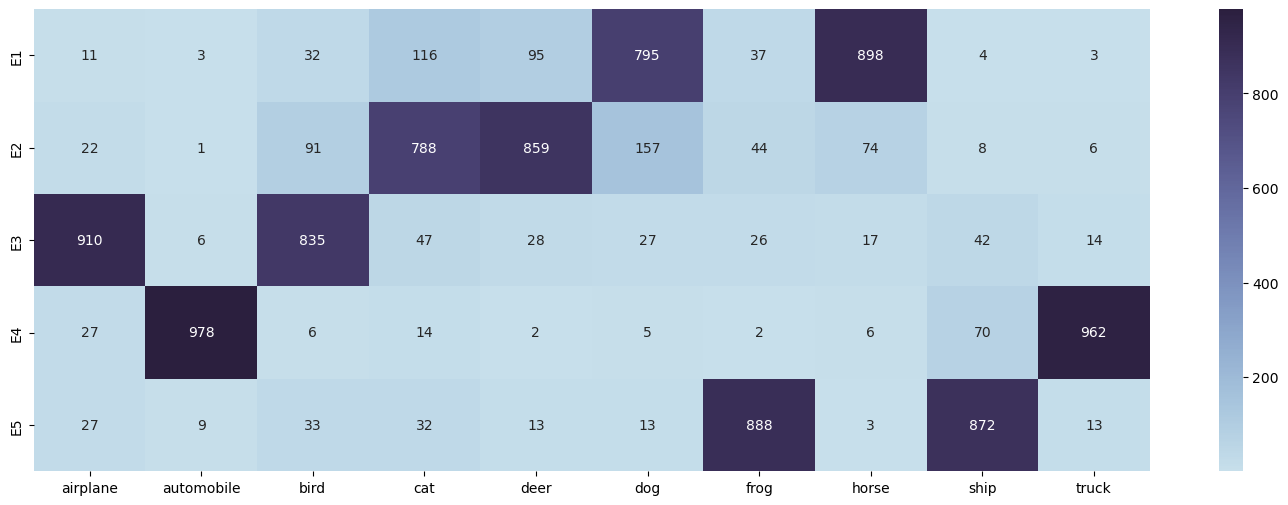

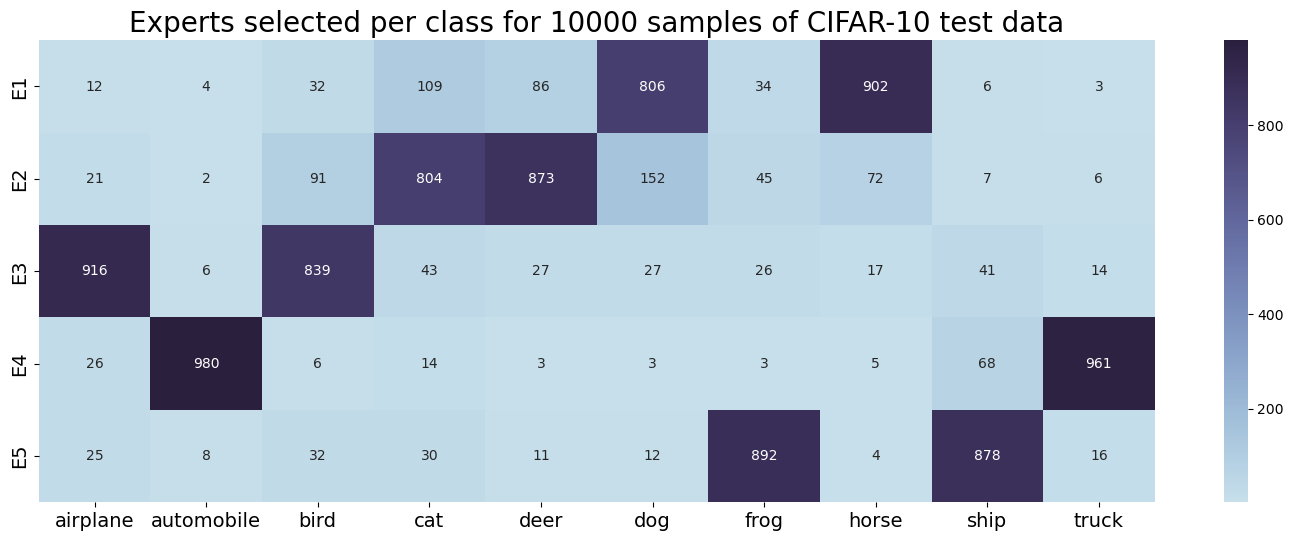

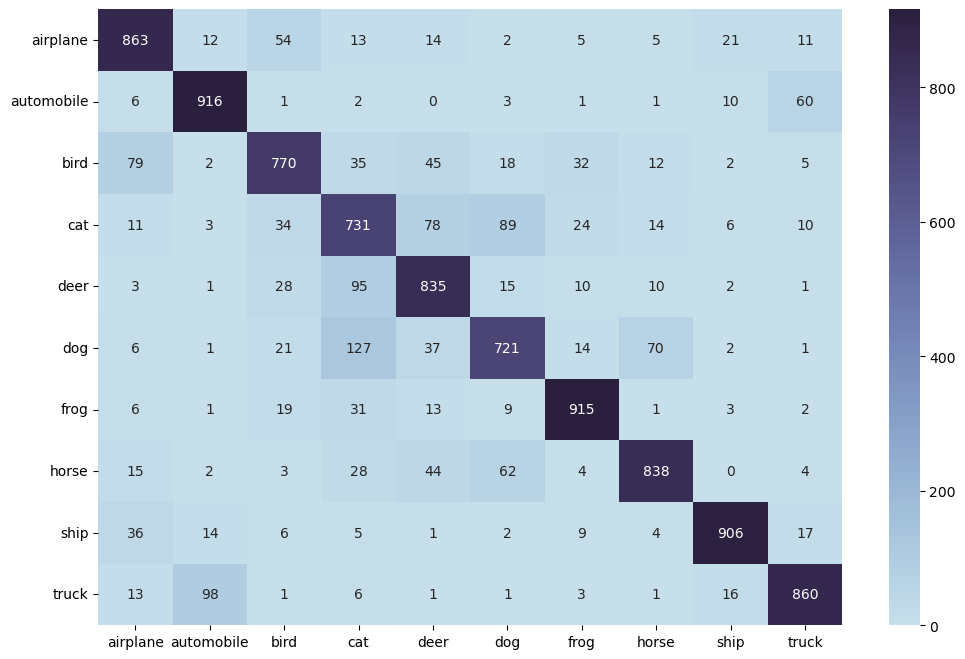

In [7]:
m = 'cifar10_with_attention_rand_init_top_2'

total_experts = 5
classes = classes_cifar10
num_epochs = 200
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0]

plot_expert_usage(m, 'moe_top_k_model', test_loader=test_loader, temps=temps,
                  w_importance_range=w_importance_range, 
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, 
                  dataset='CIFAR-10',  device=device)
